In [17]:
import pandas as pd
import seaborn as sns
import scipy.stats as st
import math as m 
import statsmodels.stats.api as sm
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Wine-Quality.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Checking for missing values

In [76]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## checking for outliers 

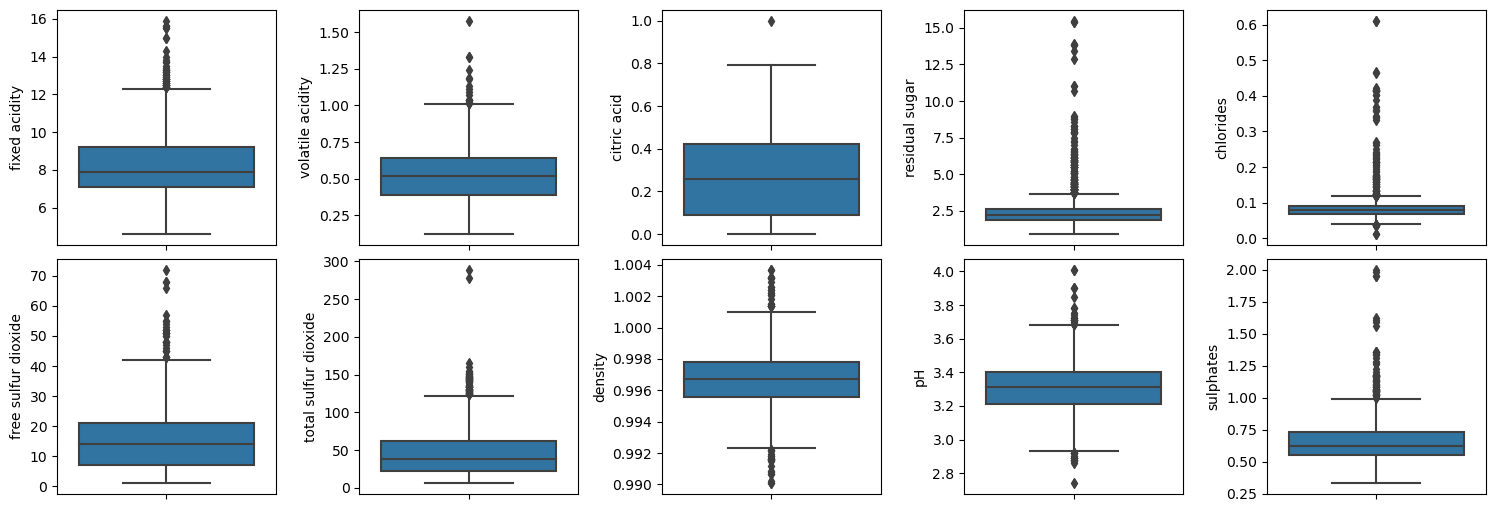

In [82]:
#Plotting boxplots to see if there are any outliers in our data

fig, ax = plt.subplots(ncols=5, nrows=2, figsize=(15, 5))
ax = ax.flatten()
index = 0
for i in df.columns:
  if i != 'quality':
    if index < len(ax):
        sns.boxplot(y=i, data=df, ax=ax[index])
        index +=1
plt.tight_layout(pad=0.4)
plt.show()

## Feature selection 

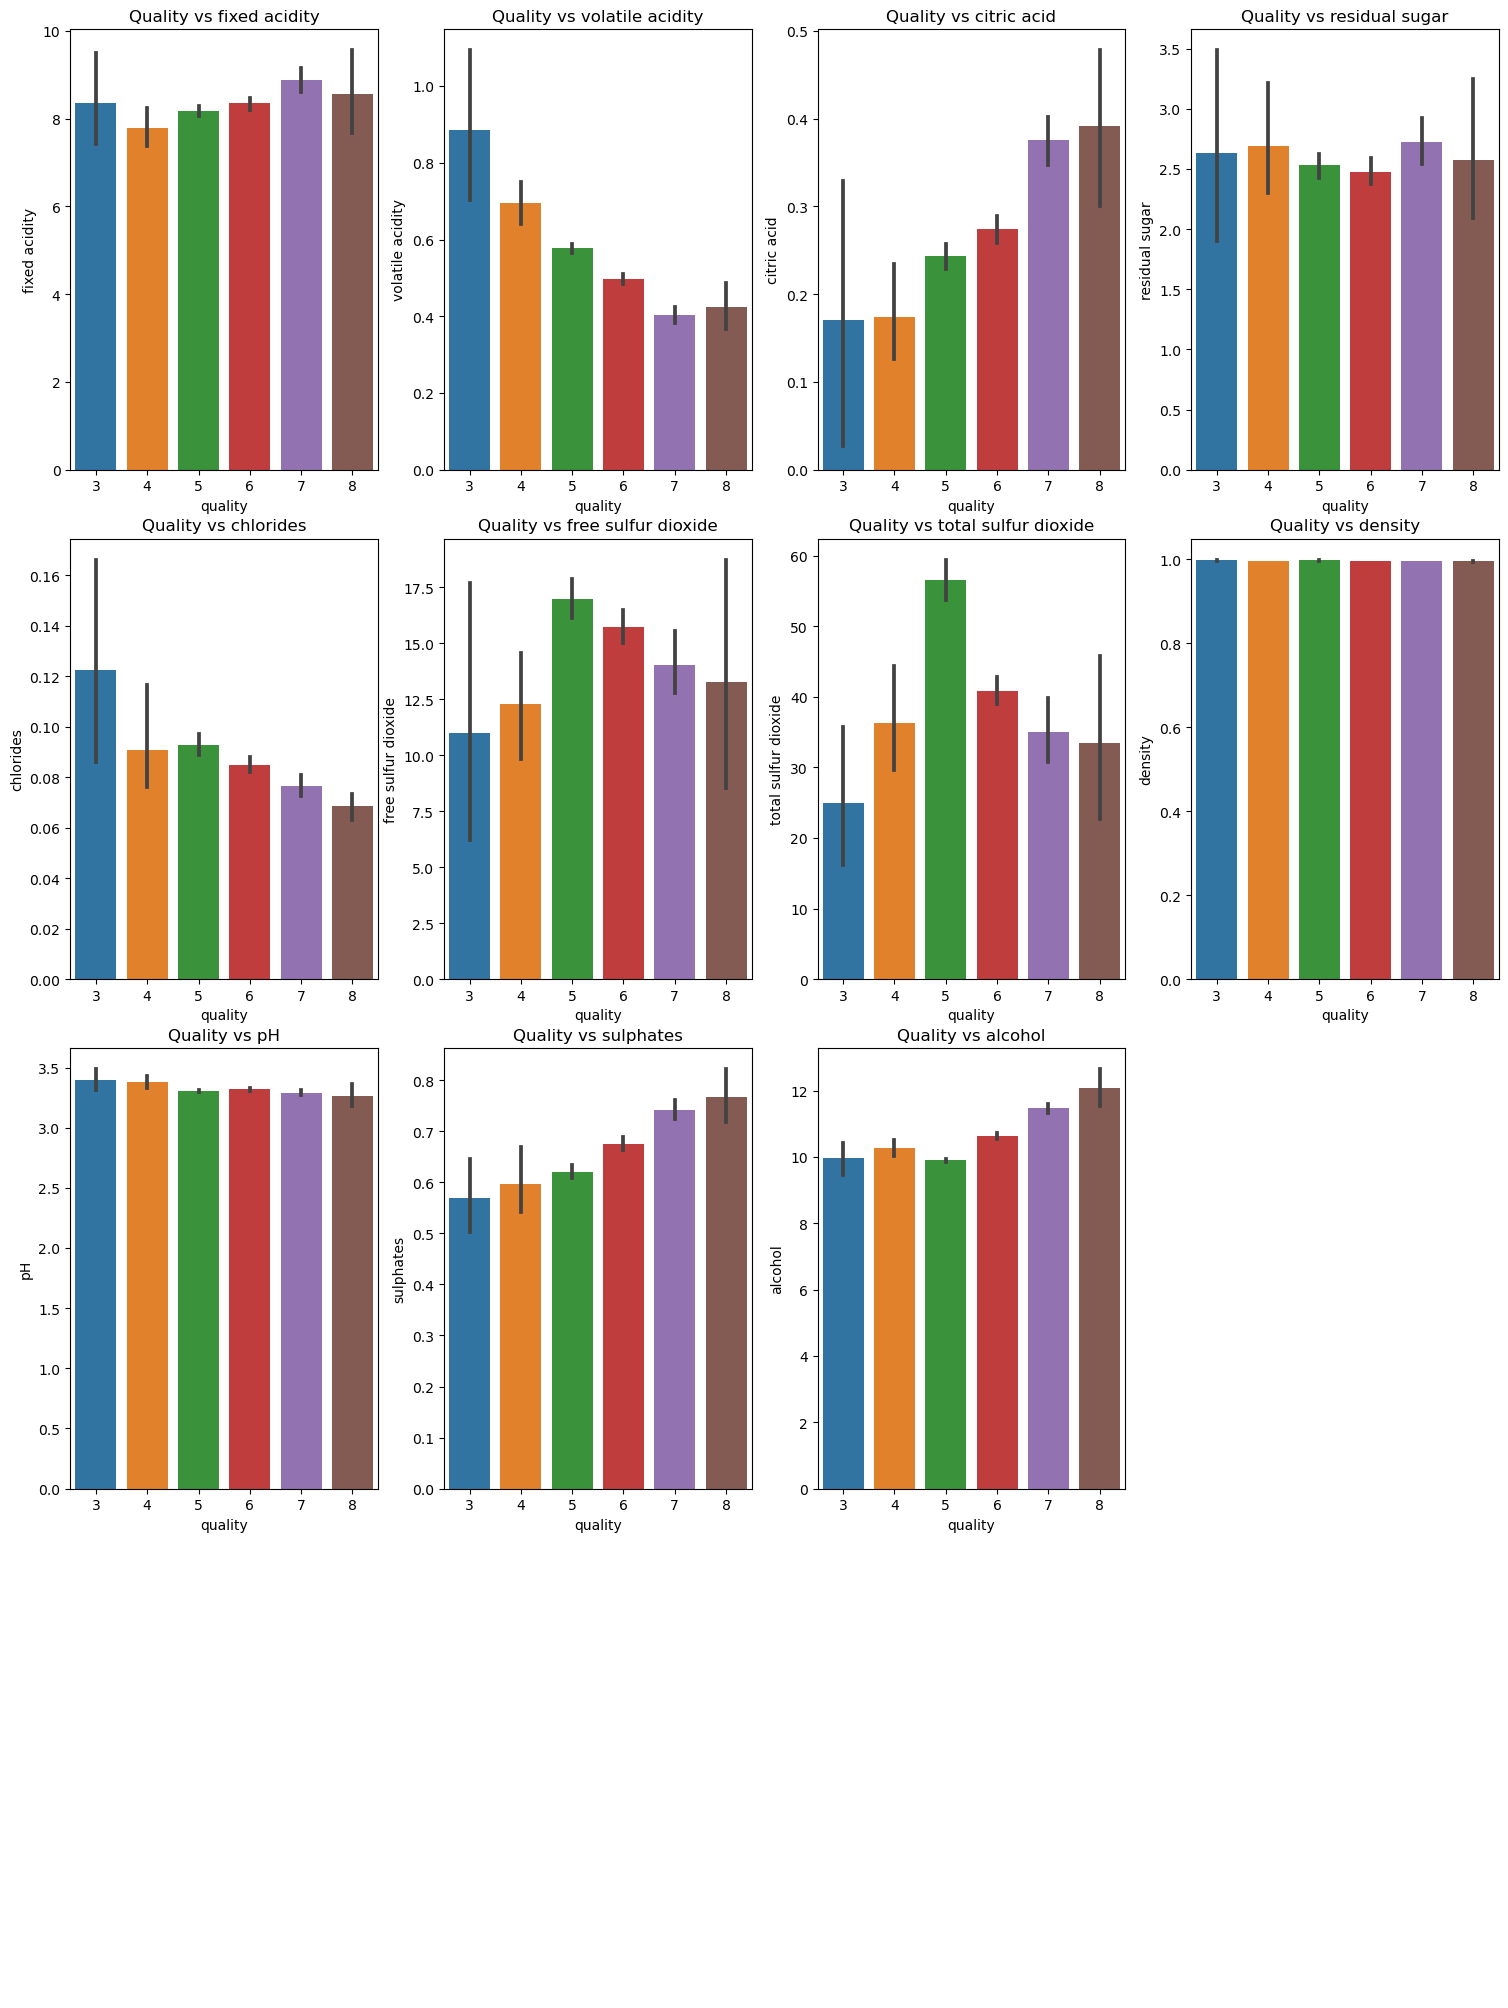

In [83]:
num_columns = len(df.columns) - 1  # Exclude 'quality' column
num_rows = 4
num_cols = min(4, num_columns)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, num_rows * 5))
axes = axes.flatten()

for i, col in enumerate(df.columns):
    if col != 'quality':
        sns.barplot(x='quality', y=col, data=df, ax=axes[i])
        axes[i].set_title(f'Quality vs {col}')

# Hide any remaining empty subplots
for i in range(num_columns, num_rows * num_cols):
    axes[i].axis('off')

plt.tight_layout(pad=0.4)
plt.show()

In [86]:
df.corr().style.background_gradient(cmap="coolwarm")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


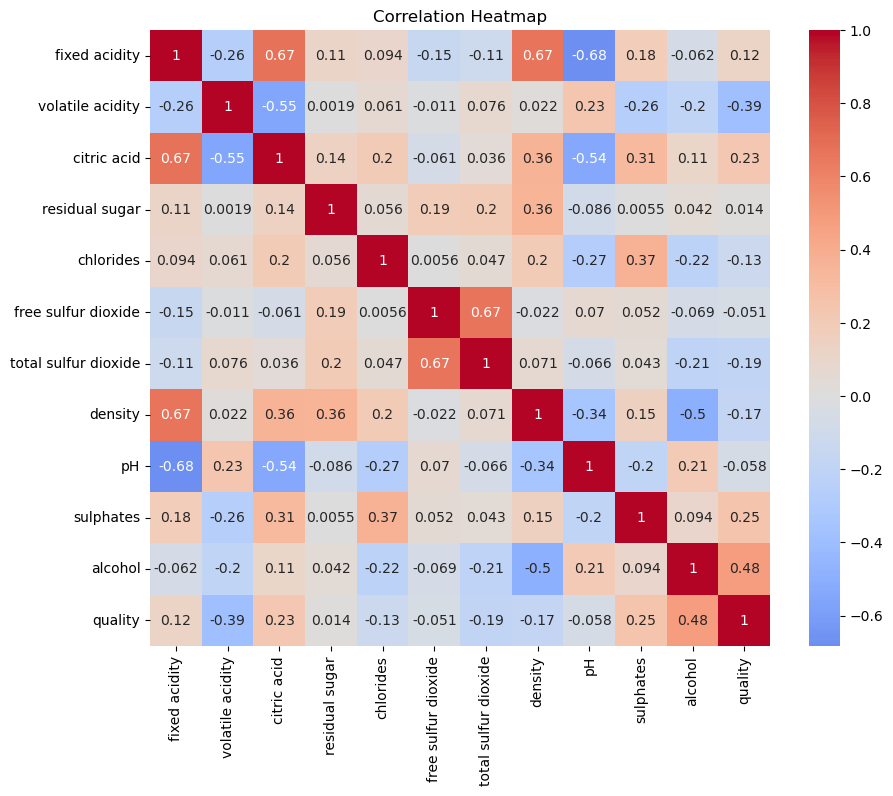

In [85]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

## Normal Distribution

<Axes: ylabel='Density'>

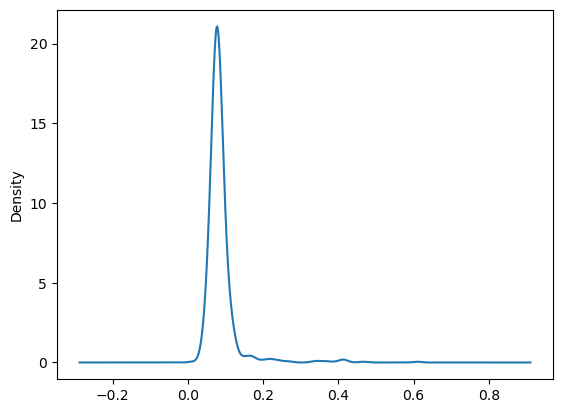

In [3]:
# Density plot of Chlorides
df.chlorides.plot.density()

In [4]:
# checking the # of observation within X standard deviation of chlorides
a = df.loc[(df.chlorides <= df.chlorides.mean() + 1 * df.chlorides.std()) &
           (df.chlorides >= df.chlorides.mean() - 1 * df.chlorides.std()), 'chlorides'].count() / df.chlorides.count()

b = df.loc[(df.chlorides <= df.chlorides.mean() + 2 * df.chlorides.std()) &
           (df.chlorides >= df.chlorides.mean() - 2 * df.chlorides.std()), 'chlorides'].count() / df.chlorides.count()

c = df.loc[(df.chlorides <= df.chlorides.mean() + 3 * df.chlorides.std()) &
           (df.chlorides >= df.chlorides.mean() - 3 * df.chlorides.std()), 'chlorides'].count() / df.chlorides.count()

result = "{:.2f}, {:.2f}, {:.2f}".format(a, b, c)
print(result)

0.95, 0.97, 0.98


<Axes: ylabel='Density'>

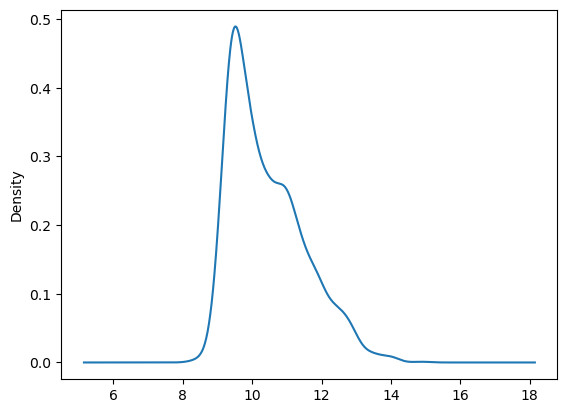

In [5]:
# Density plot of alcohol
df.alcohol.plot.density()

In [6]:
# checking the # of observation within X standard deviation of alcohol

a = df.loc[(df.alcohol <= df.alcohol.mean() + 1 * df.alcohol.std()) &
           (df.alcohol >= df.alcohol.mean() - 1 * df.alcohol.std()), 'alcohol'].count() / df.alcohol.count()

b = df.loc[(df.alcohol <= df.alcohol.mean() + 2 * df.alcohol.std()) &
           (df.alcohol >= df.alcohol.mean() - 2 * df.alcohol.std()), 'alcohol'].count() / df.alcohol.count()

c = df.loc[(df.alcohol <= df.alcohol.mean() + 3 * df.alcohol.std()) &
           (df.alcohol >= df.alcohol.mean() - 3 * df.alcohol.std()), 'alcohol'].count() / df.alcohol.count()

result = "{:.2f}, {:.2f}, {:.2f}".format(a, b, c)
print(result)

0.70, 0.96, 0.99


## Shapiro-wilk test 

In [7]:
# Shapiro-wilk test for chlorides 
stats, p = st.shapiro(df.chlorides)
print(p)
if p > 0.05:
    # if yes
    print('sample looks Gaussian/Normal(fail to reject H0)')
    # if not
else:
    print('sample does not look gaussian(rejct H0)')

0.0
sample does not look gaussian(rejct H0)


In [8]:
# Shapiro-wilk test for sulphates  
stats, p = st.shapiro(df.sulphates)
print(p)
if p > 0.05:
    # if yes
    print('sample looks Gaussian/Normal(fail to reject H0)')
    # if not
else:
    print('sample does not look gaussian(rejct H0)')

5.821617678881608e-38
sample does not look gaussian(rejct H0)


## Standard Error

In [9]:
# Standard error of alcohol
st.sem(df.alcohol)

0.026650018979018173

In [10]:
# stansdard error of pH
print(st.sem(df.pH))
df.pH.std() / m.sqrt(df.pH.count())

0.0038608683325203784


0.0038608683325203753

In [11]:
# confidence interval of the mean of the citric acid
sample_mean = df['citric acid'].mean()
sem = st.sem(df['citric acid'])
confidence_level = 0.95

# Calculate the confidence interval
confidence_interval = st.norm.interval(confidence_level, loc=sample_mean, scale=sem)

# Print the confidence interval
print(df[['citric acid']]. mean())
print(confidence_interval)

citric acid    0.270976
dtype: float64
(0.2614275451830121, 0.28052367432918307)


<Axes: xlabel='citric acid', ylabel='Count'>

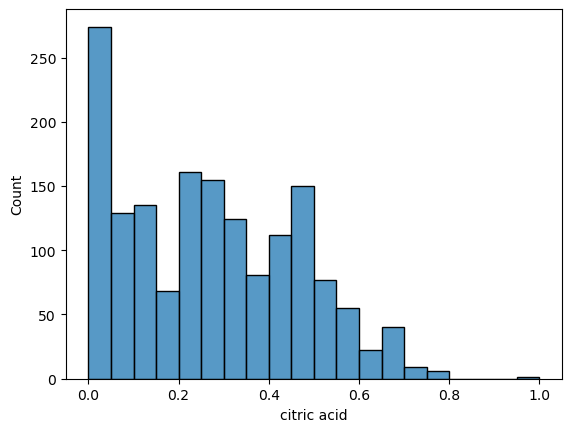

In [12]:
# Plotting a histogram 
sns.histplot(data = df['citric acid'], bins=20)

In [13]:
# confidence interval of the mean of the citric acid
sample_mean = df['density'].mean()
sem = st.sem(df['density'])
confidence_level = 0.95

# Calculate the confidence interval
confidence_interval = st.norm.interval(confidence_level, loc=sample_mean, scale=sem)

# Print the confidence interval
print(f"the mean of {df[['density']]. mean()}")
print(confidence_interval)

the mean of density    0.996747
dtype: float64
(0.9966541725972521, 0.9968391857517162)


<Axes: xlabel='density', ylabel='Count'>

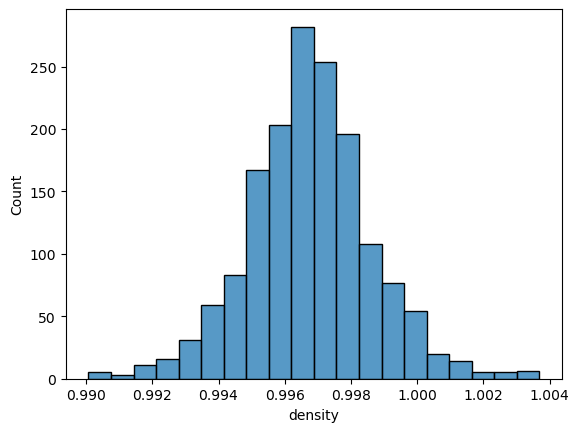

In [14]:
sns.histplot(data = df['density'], bins=20)